In [67]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# read data
loc = r'C:\Program Files\Python36\Scripts\Coursera_ML\ex1\ex1data1.txt'
df = pd.read_csv(loc, sep = ',', header = None)
df.shape

(97, 2)

In [12]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [13]:
# add x0 column
df_len = len(df)
x0 = [1] * df_len
df0 = pd.DataFrame(x0)
df0.head()

,0
0,1
1,1
2,1
3,1
4,1


In [14]:
sample = pd.concat([df0, df], axis = 1, sort=False)
sample.columns = ['x0', 'x1', 'y']
sample.head()

,x0,x1,y
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [21]:
sample.shape[1]

3

In [22]:
len(sample)

97

In [29]:
sample.iloc[:, :-1].head()

,x0,x1
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


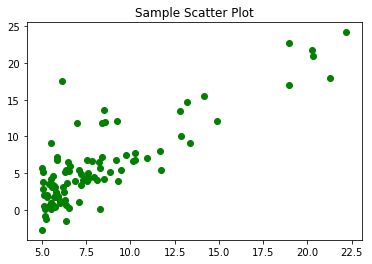

In [20]:
# plot the x1 vs y as scatter plot
fig = plt.figure()
ax = fig.addb_subplot(1, 1, 1)
points = ax.scatter(sample.x1, sample.y, c = 'green')
title = ax.set_title('Sample Scatter Plot')

In [30]:
# test multiplication in cost function
def cost1(x, y, theta):
    m = len(y)
    hx = 0
    if len(theta) == x.shape[1]:
        for i in range(x.shape[0]):
            for j in range(len(theta)):
                hx += theta[j] * x.iloc[i, j]
        return hx

test1 = cost1(sample.iloc[:, :-1], sample.y, [2, 1])
test1

985.5006000000001

In [32]:
# test np.dot function for multiplication
def cost2(x, y, theta):
    m = len(y)
    hx = np.dot(x, theta).sum()
    return hx

test2 = cost2(sample.iloc[:, :-1], sample.y, [2, 1])
test2

985.5006

In [34]:
# x.dot(theta)
sample.iloc[:, :-1].dot([2, 1]).sum()

985.5006

In [58]:
# redo the cost function with np.dot
def computeCost(x, y, theta):
    m = len(y)
    hx = np.dot(x, theta)
    j = ((x.dot(theta) - y) ** 2).sum() / (2 * m)
    return j

cost_j = computeCost(sample.iloc[:, :-1], sample.y, [0, 0])
cost_j

32.072733877455676

In [60]:
# gradient descent for simple linear
def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    j_hist = [0] * num_iters
    
    for i in range(num_iters):
        hx = np.dot(x, theta)
        loss = hx - y
        # grad = x.T.dot(loss) / m
        grad = loss.dot(x) / m
        theta = theta - alpha * grad
        
        j_hist[i] = computeCost(x, y, theta)
    
    return theta, j_hist

test_theta, test_j = gradient_descent(sample.iloc[:, :-1], sample.y, [0, 0], 0.01, 1500)
test_theta

x0   -3.630291
x1    1.166362
Name: y, dtype: float64

In [63]:
predict1 = ([1, 3.5] * test_theta).sum()
predict2 = ([1, 7] * test_theta).sum()
print (predict1)
print (predict2)

0.4519767867701767
4.534245012944714


In [124]:
def gradient_descent_vals(x, y, theta, alpha, num_iters):
    m = len(y)
    j_hist = [0] * num_iters
    theta_df = pd.DataFrame(theta).T
    
    for i in range(num_iters):
        hx = np.dot(x, theta)
        loss = hx - y
        # grad = x.T.dot(loss) / m
        grad = loss.dot(x) / m
        theta = theta - alpha * grad
        
        theta_list = theta.tolist()
        theta_new = pd.DataFrame(theta_list).T
        # print(theta_new)
        theta_df = pd.concat([theta_df, theta_new], axis = 0)
        
        j_hist[i] = computeCost(x, y, theta)
    
    return theta_df.iloc[1:, :], j_hist

test_theta, j_hist = gradient_descent_vals(sample.iloc[:, :-1], sample.y, [0, 0], 0.01, 1500)


In [126]:
j = pd.DataFrame(j_hist)
theta_val = test_theta.reset_index(drop = True)
#theta_val
vals = pd.concat([theta_val, j], axis = 1)
vals.columns = ['theta0', 'theta1', 'j']
vals.head()

,theta0,theta1,j
0,0.058391,0.653288,6.737190
1,0.062892,0.770010,5.931594
2,0.057823,0.791348,5.901155
3,0.051064,0.795730,5.895229
4,0.044014,0.797096,5.890095


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


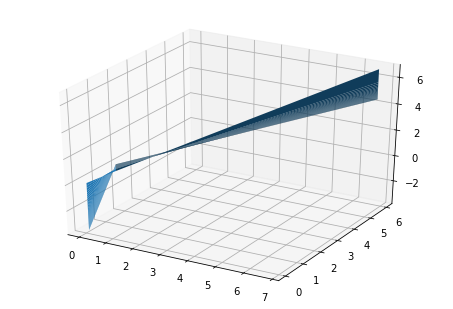

In [127]:
theta_array = vals.as_matrix()

# surface plot
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta_array[0], theta_array[1], theta_array)
plt.show()

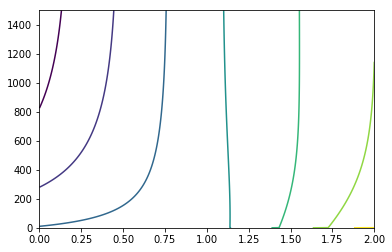

In [128]:
# contour plot
plt.contour(vals)